In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                   names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary'])
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [4]:
data[data.sex == ' Male'].age.mean().round(2)

39.43

In [5]:
'{} %'.format(round(data[data['native-country'] == ' United-States'].shape[0] / data.shape[0] * 100, 2))

'89.59 %'

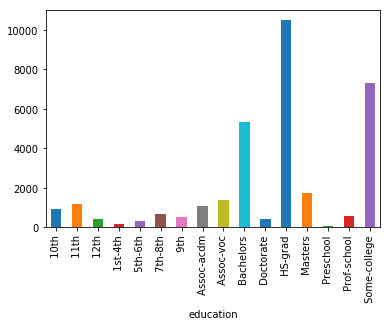

In [8]:
plotbar = data.groupby('education').size()
plotbar.plot.bar()

In [9]:
round(data[data['marital-status'] == ' Divorced'].fnlwgt.mean(), 2)

185802.79

In [10]:
round(data[data['marital-status'] == ' Divorced'].fnlwgt.std(), 2)

105646.79

In [11]:
data_salary = data.loc[data['salary'] == ' >50K']
data_salary.loc[lambda table: table['education'].isin([' Bachelors', ' Masters', ' Doctorate'])].shape[0] > data_salary.shape[0] / 2

False

In [12]:
data.groupby(['race', 'sex']).age.max()

race                 sex    
 Amer-Indian-Eskimo   Female    80
                      Male      82
 Asian-Pac-Islander   Female    75
                      Male      90
 Black                Female    90
                      Male      90
 Other                Female    74
                      Male      77
 White                Female    90
                      Male      90
Name: age, dtype: int64

In [13]:
data[data['occupation'] == ' Farming-fishing'].groupby('native-country').size().sort_values(ascending=False)[:1]

native-country
 United-States    879
dtype: int64

In [14]:
male = data[data['sex'] == " Male"]
male_bachelors = male[male['education'] == " Bachelors"].shape[0]
male_masters = male[male['education'] == " Masters"].shape[0]

female = data[data['sex'] == " Female"]
female_bachelors = female[female['education'] == " Bachelors"].shape[0]
female_masters = female[female['education'] == " Masters"].shape[0]

male_bachelors / male_masters > female_bachelors / female_masters

True

In [15]:
max_time = data['hours-per-week'].max()
print('max time: {}h'.format(max_time))
table = data[data['hours-per-week'] == max_time]
print('people who work 99h: {}'.format(table.shape[0]))
table.loc[:, 'salary' : 'salary']

max time: 99h
people who work 99h: 85


,salary
935,>50K
1172,>50K
1887,>50K
3578,>50K
4086,<=50K
4308,<=50K
4441,>50K
5376,<=50K
5432,<=50K
6618,<=50K
